In [12]:
%matplotlib inline

In [1]:
import sys
sys.path.insert(0, r"C:\Inicio_dev\sysver\PyVerify")
import pandas as pd
import numpy as np
from pverify import *

# Convert PyVerify HDF5 to Pandas HDFStore

In [2]:
convert_to_pandas_hdfstore(
    source=r"C:\temp\GasSetup\2017-11-08_12-46-11_LAB\GasSetup\results.hdf5",
    dst_data=r"C:\temp\gas_data.h5",
    dst_wf=r"C:\temp\gas_wf.h5",
    complevel=9,
    complib="blosc"
)

# Open/Close store

In [3]:
store = PV_HDFStore(r"C:\temp\gas_data.h5", mode="r")

In [ ]:
store.close()

# Query parameter table (index table)

In [4]:
store.pv_select_index("PAS_Freq == 10 and PAS_RepRuns == 0 and CO2_conc_ppm >= 0 and CO2_conc_ppm <= 500")

,CO2Bottle_conc,CO2SetPoint_Tolerance,CO2_conc_ppm,DUT,PAS_Freq,PAS_PulseCnt,PAS_RepRuns,Pressure,Pressure_Difference,RelHumidity,RelHumidity_Difference,Stabilization_Time,Temp,Temperature,Temperature_Difference
0,2.0,10.0,0.0,,10.0,32.0,0.0,0.0,-1.0,0.0,-1.0,180.0,-273.15,-273.15,-1.0
288,2.0,10.0,0.0,,10.0,32.0,0.0,0.0,-1.0,0.0,-1.0,180.0,-273.15,-273.15,-1.0
576,2.0,10.0,200.0,,10.0,32.0,0.0,0.0,-1.0,0.0,-1.0,180.0,-273.15,-273.15,-1.0
864,2.0,10.0,400.0,,10.0,32.0,0.0,0.0,-1.0,0.0,-1.0,180.0,-273.15,-273.15,-1.0
1152,2.0,10.0,500.0,,10.0,32.0,0.0,0.0,-1.0,0.0,-1.0,180.0,-273.15,-273.15,-1.0
2880,2.0,10.0,500.0,,10.0,32.0,0.0,0.0,-1.0,0.0,-1.0,180.0,-273.15,-273.15,-1.0
3168,2.0,10.0,0.0,,10.0,32.0,0.0,0.0,-1.0,0.0,-1.0,180.0,-273.15,-273.15,-1.0
3456,2.0,10.0,400.0,,10.0,32.0,0.0,0.0,-1.0,0.0,-1.0,180.0,-273.15,-273.15,-1.0
7776,2.0,10.0,0.0,,10.0,32.0,0.0,0.0,-1.0,0.0,-1.0,180.0,-273.15,-273.15,-1.0


Or just getting the index to use in subsequent table queries

In [5]:
index = store.pv_select_index("PAS_Freq == 10 and PAS_RepRuns == 0 and CO2_conc_ppm <= 500").index
store.pv_select_data(where=index, columns=["CO2_KCD_actual"])

,CO2_KCD_actual
0,89.0
288,100.0
576,303.0
864,508.0
1152,595.0
2880,604.0
3168,111.0
3456,516.0
7776,115.0


# Query parameter information

In [6]:
store.pv_select_info(where="dtype == 'scalar'", columns=["index", "type", "name", "unit", "dtype"])

,type,name,unit,dtype
0,parameter,CO2Bottle_conc,%,scalar
1,parameter,CO2SetPoint_Tolerance,%,scalar
2,parameter,CO2_conc_ppm,,scalar
4,parameter,PAS_Freq,Hz,scalar
5,parameter,PAS_PulseCnt,,scalar
6,parameter,PAS_RepRuns,,scalar
7,parameter,Pressure,,scalar
8,parameter,Pressure_Difference,,scalar
9,parameter,RelHumidity,%,scalar
10,parameter,RelHumidity_Difference,,scalar


# Query data table

In [7]:
store.pv_select_data(columns=["CO2_KCD_actual", "CO2_ppm_actual"])

,CO2_KCD_actual,CO2_ppm_actual
0,89.0,0.97
1,87.0,0.22
2,88.0,0.16
3,88.0,-0.04
4,85.0,-0.77
5,85.0,0.14
6,82.0,-0.23
7,78.0,0.00
8,81.0,0.13
9,85.0,-0.31


# Query both parameter table (index table) and data table

In [8]:
store.pv_select_index_and_data(where_index="PAS_Freq == 10", 
                               where_data="CO2_KCD_actual < 85",
                               columns=["Pressure_actual"])

,Pressure_actual
6,957.56
7,957.62
8,957.68
11,957.83
18,958.05
19,958.07
23,958.14


Or only return the data columns by using "dropindexcols=True"

In [9]:
store.pv_select_index_and_data(where_index="PAS_Freq == 10",
                               where_data="CO2_KCD_actual < 85", 
                               dropindexcols=True)

,Air_flow_sccm,CO2_KCD_actual,CO2_QbFigaro_actual,CO2_QbK30_actual,CO2_flow_sccm,CO2_ppm_actual,CO2_ppm_target,Minime3_Temperature,Pressure_actual,RelHumidity_SHT_actual,RelHumidity_actual,Temperature_actual,Time_to_settle
6,NaN,82.0,-3.0,0.0,NaN,-0.23,NaN,38.0,957.56,5.0,-0.61,24.78,0.0
7,NaN,78.0,-3.0,0.0,NaN,0.00,NaN,39.0,957.62,5.0,-0.61,24.78,0.0
8,NaN,81.0,-3.0,0.0,NaN,0.13,NaN,39.0,957.68,5.0,-0.61,24.79,0.0
11,NaN,84.0,-3.0,0.0,NaN,-0.87,NaN,41.0,957.83,6.0,-0.30,24.79,0.0
18,NaN,83.0,-3.0,0.0,NaN,-0.84,NaN,42.0,958.05,6.0,-0.61,24.81,0.0
19,NaN,83.0,-3.0,0.0,NaN,0.01,NaN,43.0,958.07,6.0,-0.30,24.81,0.0
23,NaN,82.0,-3.0,0.0,NaN,-0.77,NaN,43.0,958.14,7.0,-0.61,24.82,0.0


# Query waveforms from store and iterate

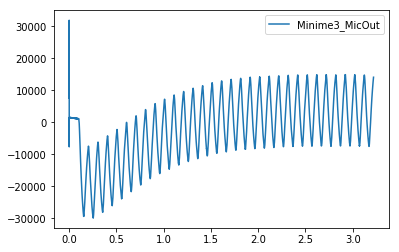

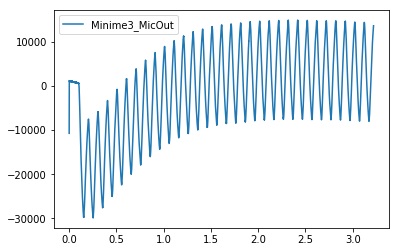

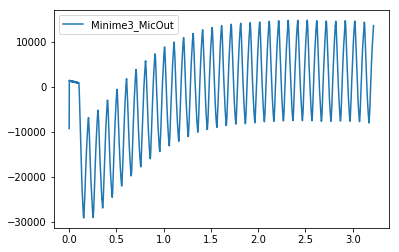

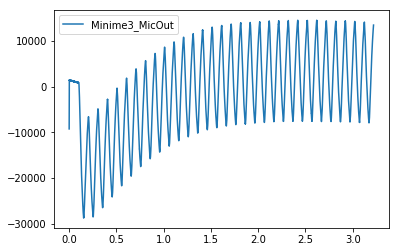

In [13]:
for df in store.pv_select_from_wfstore(wfstorefile=r"C:\temp\gas_wf.h5", 
                                       where="PAS_Freq = 10 and PAS_RepRuns = 0 and CO2_conc_ppm = 0",
                                       iterator=True):
    df.plot()